In [1]:
import numpy as np
import matplotlib.pyplot as plt

import h5py
from glob import glob
import string
from PIL import Image

import cv2

In [2]:
vgg_test = np.load("../bottleneck_features/vgg_combined_data/vgg16_test_bottleneck_features.pkl_01.npy")
vgg_test_labels = np.load("../bottleneck_features/vgg_combined_data/vgg16_test_bottleneck_labels.pkl")

In [3]:
vgg_train = np.load("../bottleneck_features/vgg_combined_data/vgg16_train_bottleneck_features.pkl_01.npy")
vgg_train_labels = np.load("../bottleneck_features/vgg_combined_data/vgg16_train_bottleneck_labels.pkl")

In [4]:
print (vgg_train.shape, np.array(vgg_train_labels).shape)
print (vgg_test.shape, np.array(vgg_test_labels).shape)

(1440, 7, 7, 512) (1455,)
(352, 7, 7, 512) (359,)


In [5]:
import string

label_dict = {pos: letter
              for pos, letter in enumerate(string.ascii_uppercase)}
dict_x = {x:vgg_train_labels.count(x) for x in vgg_train_labels}

dict_vgg = dict((label_dict[key], value) for (key, value) in dict_x.items())

In [7]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.,
                             featurewise_center=True)

datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape(1, 1, 3)

generator = datagen.flow_from_directory(
            directory="../train_data/massey_split/train/",
            target_size=(244, 244),
            batch_size=32,
            class_mode="categorical",
            shuffle=False
            )

Using TensorFlow backend.


Found 1244 images belonging to 26 classes.


In [8]:
generator = datagen.flow_from_directory(
            directory="../train_data/FINAL_DATA/validation/",
            target_size=(244, 244),
            batch_size=32,
            class_mode="categorical",
            shuffle=False
            )

Found 374 images belonging to 26 classes.


In [9]:
res_test = np.load("../bottleneck_features/resnet_combined_data/resnet_test_bottleneck_features.pkl_01.npy")
res_test_labels = np.load("../bottleneck_features/resnet_combined_data/resnet_test_bottleneck_labels.pkl")

In [10]:
res_train = np.load("../bottleneck_features/resnet_combined_data/resnet_train_bottleneck_features.pkl_01.npy")
res_train_labels = np.load("../bottleneck_features/resnet_combined_data/resnet_train_bottleneck_labels.pkl")

In [11]:
print (res_train.shape, np.array(res_train_labels).shape)
print (res_test.shape, np.array(res_test_labels).shape)

(1504, 1, 1, 2048) (1504,)
(352, 1, 1, 2048) (374,)


In [12]:
import string

label_dict = {pos: letter
              for pos, letter in enumerate(string.ascii_uppercase)}
dict_x = {x:res_train_labels.count(x) for x in res_train_labels}

dict_res = dict((label_dict[key], value) for (key, value) in dict_x.items())

In [8]:
img_a = cv2.imread("../sample_data/test_a.jpg")
img_b = cv2.imread("../sample_data/test_b.jpg")
img_e = cv2.imread("../sample_data/test_e.jpg")

In [68]:
def preprocess_frame(directory, img_format="jpg", size=244,
                     drop_green=False, gray=False):
    """Pre-processing for frames captured from video stored in single directory

    Parameters
    ----------
    directory: str
        Path to directory containing images to be processed
    img_format: str
        Format of image to be loaded; must be one of either 'jpg' or 'png'
        default = 'jpg'
    size: int
        Size to which image is re-sized (square of shape: size x size)
    drop_green: bool
        Whether to drop the green channel, for images captured on green screen
    gray: bool
        Whether to convert image to gray scale

    Returns
    -------
    images: np.ndarray
        4D array of processed images
    """
    assert img_format in ["jpg", "png"], "img_format parameter must be one of 'jpg' or 'png'"
    img_format = "*." + img_format
    nb_images = len(glob(directory + img_format))
    assert nb_images > 0, "No images found in directory"
    num_channels = 3
    images = np.empty((nb_images, size, size, num_channels))
    # labels = np.array([directory[-2] for _ in range(nb_images)])
    for i, infile in enumerate(glob(directory + img_format)):
        img = cv2.imread(infile)
        if drop_green:
            img[:, :, 1] = 0
        if gray:
            num_channels = 1
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = square_pad(img)
        img = cv2.resize(img, (size, size))
        img = np.reshape(img, (1, size, size, num_channels))
        images[i, :, :, :] = img

    return images

In [58]:

def square_pad(img, padding_color=[0, 0, 0]):
    """Add margins to image to make it square keeping largest original dimension

    Parameters
    ----------
    img: numpy.ndarray
        Image to be processed
    padding_color: list
        Define background colour to pad image; preserves RGB/BGR colour channel order of img

    Returns
    -------
    padded_img: np.ndarray
        Image padded to a square shape

    """
    height = img.shape[0]
    width = img.shape[1]
    # find difference between longest side
    diff = np.abs(width - height)
    # amount of padding = half the diff between width and height
    pad_diff = diff // 2

    if height > width:
        # letter is longer than it is wide
        pad_top = 0
        pad_bottom = 0
        pad_left = pad_diff
        pad_right = pad_diff
        padded_img = cv2.copyMakeBorder(img,
                                        top=pad_top,
                                        bottom=pad_bottom,
                                        left=pad_left,
                                        right=pad_right,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=padding_color)
    elif width > height:
        # image is wide
        pad_top = pad_diff
        pad_bottom = pad_diff
        pad_left = 0
        pad_right = 0
        padded_img = cv2.copyMakeBorder(img,
                                        top=pad_top,
                                        bottom=pad_bottom,
                                        left=pad_left,
                                        right=pad_right,
                                        borderType=cv2.BORDER_CONSTANT,
                                        value=padding_color)
    elif width == height:
        padded_img = img.copy()

    return padded_img

In [69]:
x = preprocess_frame(directory="../sample_data/",
                    gray=True,
                    img_format = "png")

AssertionError: No images found in directory

In [66]:
x

'No images found in directory'

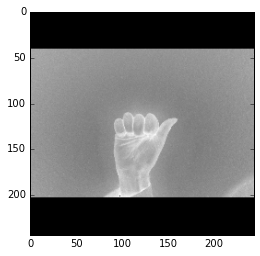

In [49]:
plt.imshow(y[:,:,::-1])
plt.show()

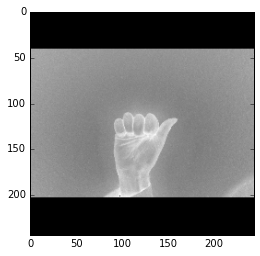

In [45]:
plt.imshow(y)
plt.show()